# Учебный проект 3_Исследование объявлений о продаже квартир

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python и загрузка данных](#Импорт)
* [Предобработка данных](#Предобработка)
    * [Обработка пустых значений](#Предобработка_пустоты)
    * [Преобразование типов данных в столбцах таблицы](#Предобработка_типы)
    * [Проверка датасета на наличие дубликатов](#Предобработка_дубликаты)
    * [Инициализация новых столбцов в наборе данных](#Предобработка_столбцы)
* [Исследовательский анализ данных](#Исследование)
    * [Построение гистограмм распределения значений](#Исследование_гистограммы)
    * [Изучение скорости продажи недвижимости](#Исследование_показОбъявлений)
    * [Обработка аномальных значений в наборе данных](#Исследование_аномалии)
    * [Изучение стоимости жилья в 10 самых популярных населенных пунктах](#Изучение_топ10)
    * [Изучение стоимости недвижимости в Санкт-Петербурге в зависимости от расположения от центра город](#Исследование_центрПитера)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные сервиса Яндекс Недвижимость — `архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет`. 

**Задача**: `Определить рыночную стоимость объектов недвижимости`.

Путь решения: `Проведение исследовательского анализа данных и установка параметров, влияющих на цену объектов`. В дальнейшем это послужит основой для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. **Первые вписаны пользователем**, **вторые — получены автоматически на основе картографических данных**.

Получены автоматически из геосервисов:
* расстояние до центра;
* расстояние до аэропорта;
* расстояние до ближайшего парка;
* расстояние до ближайшего водоема;
* количество парков;
* количество водоёмов.

## Импорт библиотек Python и загрузка данных

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменной **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * перечень столбцов набора данных;
    * общей информации о наборе данных;
4. Построение гистограмм распределения числовых показателей;
5. Формирование вывода по итогам данного этапа.

In [104]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
# инициализация переменной data - запись набора данных
data = pd.read_csv("~/Desktop/YandexPraktikum_projects/datasets/real_estate_data.csv", sep = '\t')

# вывод на экран структуры набора данных
display(data.head())

# вывод на экран перечня всех столбцов датасета
for column in data.columns.to_list():
    print(f'* {column}')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* total_images
* last_price
* total_area
* first_day_exposition
* rooms
* ceiling_height
* floors_total
* living_area
* floor
* is_apartment
* studio
* open_plan
* kitchen_area
* balcony
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition


**Описание данных**

* total_images - число фотографий квартиры в объявлении;
* last_price - цена на момент снятия с публикации;
* total_area - общая площадь квартиры, в квадратных метрах;
* first_day_exposition - дата публикации;
* rooms - число комнат;
* ceiling_height - высота потолков, в метрах;
* floors_total - всего этажей в доме;
* living_area - жилая площадь, в квадратных метрах;
* floor - этаж;
* is_apartment - апартаменты (булев тип данных);
* studio - квартира-студия (булев тип данных);
* open_plan - свободная планировка (булев тип данных);
* kitchen_area - площадь кухни, в квадратных метрах;
* balcony - число балконов;
* locality_name - название населенного пункта;
* airports_nearest - расстояние до ближайшего аэропорта, в метрах;
* cityCenters_nearest - расстояние до центра города, в метрах;
* parks_around3000 - число парков в радиусе 3 км;
* parks_nearest - расстояние до ближайшего парка, в метрах;
* ponds_around3000 - число водоемов в радиусе 3 км;
* ponds_nearest - расстояние до ближайшего водоема, в метрах;
* days_exposition - сколько дней было размещено объявление (от публикации до снятия);

In [106]:
# вывод на экран общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

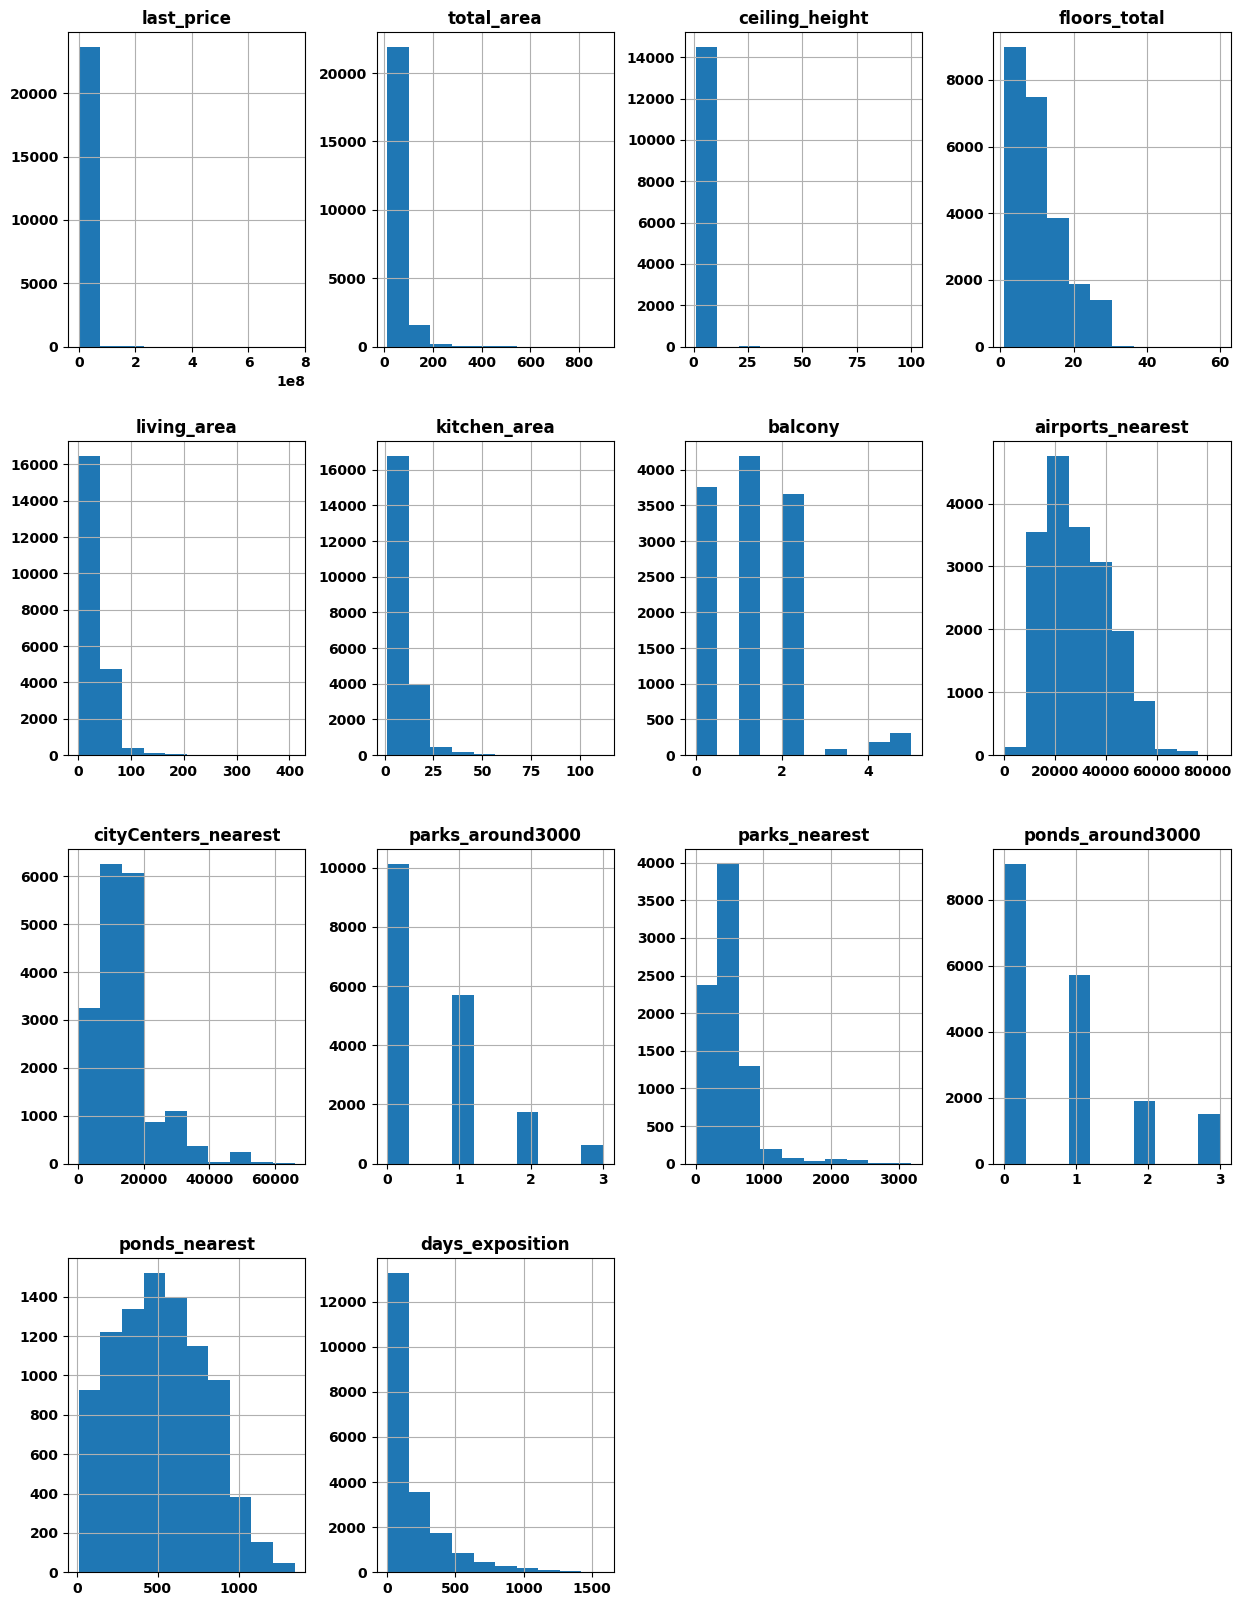

In [107]:
# построение диаграммы для всех числовых столбцов текущего набора данных
# plt.figure(figsize = (15, 20))
(data
 .select_dtypes(include='float64')
 .hist(figsize = (15, 20)))
plt.show()

**Вывод**:

1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas** и **numpy**;
    * для визуализации данных - **matplotlib.pyplot**;
2. Загружены данные в рабочую среду Jupyter Notebook. Инициализирована переменная **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * переченя столбцов набора данных;
    * общей информации о наборе данных;
4. Набор данных характеризуется следующими показателями:
    * 23 699 - количество строк в датасете;
    * 22 - количество показателей, описывающих объект;
    * 2 столбца, имеющих явный булевый тип данных;
    * 14 столбцов, имеющих явный тип 'float';
    * 3 столбца - тип данных 'int';
    * 3 столбца - тип данных 'object';
    * 2 775 - самое минимальное количество непустых значений в столбце (признак 'is_apartment'); 
5. Построены гистограммы распределения числовых показателей. При первичном взгляде на полученные гистограммы заметны явные выбросы по признаку 'ceiling_height'. Детальное изучение гистограмм распределения будет выполнено на шаге предобработки данных;

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Обработка пустых значений в данных;
2. Преобразование типов данных в столбцах таблицы;
3. Проверка датасета на дубликаты и очистка данных:
    * Явные дубликаты;
    * Неявные дубликаты;
4. Формирование вывода по итогам данного этапа.

### Обработка пустых значений в данных <a class = 'anchor' id = 'Предобработка_пустоты'></a>

In [108]:
# формирование отчета с количеством и долей пропущенных значений по столбцам
missingV_report = data.isna().sum().to_frame()
missingV_report = missingV_report.rename(columns = {0 : 'missing_values'})
missingV_report['%_of_total'] = (missingV_report.missing_values * 100 / data.shape[0]).round(2)

# вывод на экран количества пропущенных значений по столбцам
print("Количество пустых значений в столбцах датасета")
display(missingV_report.sort_values(by = 'missing_values', ascending = False))

Количество пустых значений в столбцах датасета


,missing_values,%_of_total
is_apartment,20924,88.29
parks_nearest,15620,65.91
ponds_nearest,14589,61.56
balcony,11519,48.61
ceiling_height,9195,38.80
airports_nearest,5542,23.38
cityCenters_nearest,5519,23.29
ponds_around3000,5518,23.28
parks_around3000,5518,23.28
days_exposition,3181,13.42


Количество пустых значений в столбцах 'floors_total' и 'locality_name' слишком мало по сравнению с общим количеством данных в имеющемся наборе.

По этой причине можно удалить данные строки из общего датасета вместо попытки ручного заполнения пустот.

In [109]:
# удаление из набора данных пустых значений в столбцах 'floors_total' и 'locality_name'
for column in ['locality_name', 'floors_total']:
    data = data.dropna(subset = column)

В наборе данных есть объявления, где система автоматически указывает количество парков поблизости на основании геолокации - `"parks_around3000"`. Так же в наборе данных есть объявления, у которых указано расстояние до ближайшего парка - "parks_nearest".

При этом, есть большое количество пропущенных значений в столбце "parks_nearest", которые потенциально можно заменить средним или медианным значением расстояния при условии, что для данных записей выполняется условие: **"Есть парки поблизости, но расстояние до ближайшего не известно"**.

Выведем количество записей и их долю от общего набора, если они соответствуют условию выше.

In [110]:
# вывод на экран количества объектов, для которых известно наличие парков, но не указано расстояние до ближайшего
print('Количество объектов, где известно наличие парка в радиусе 3 км, но не известно расстояние до ближайшего:', data[(data['parks_nearest'].isna() == True) & (data['parks_around3000'].isna() == False)].shape[0])
print('Доля объявлений от общего набора данных: {:.1%}'.format(data[(data['parks_nearest'].isna() == True) & (data['parks_around3000'].isna() == False)].shape[0] / data.shape[0]))

Количество объектов, где известно наличие парка в радиусе 3 км, но не известно расстояние до ближайшего: 10035
Доля объявлений от общего набора данных: 42.6%


К сожалению, доля записей с неизвестным расстоянием, но с расположенными поблизости `парками`, слишком велика, чтобы заполнить пустоты одинаковым значением - **это внесет искажения в исходные данные и не позволит провести объективный анализ.**

Рассмотрим ту же самую ситуацию с тем же условием, но для данных о водоемах.

In [111]:
# вывод на экран количества объектов, для которых известно наличие водоемов, но не указано расстояние до ближайшего
print('Количество объектов, где известно наличие водоема в радиусе 3 км, но не известно расстояние до ближайшего:', data[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'].isna() == False)].shape[0])
print('Доля объявлений от общего набора данных: {:.1%}'.format(data[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'].isna() == False)].shape[0] / data.shape[0]))

Количество объектов, где известно наличие водоема в радиусе 3 км, но не известно расстояние до ближайшего: 9029
Доля объявлений от общего набора данных: 38.3%


К сожалению, доля записей с неизвестным расстоянием, но с расположенными поблизости `водоемами`, слишком велика, чтобы заполнить пустоты одинаковым значением - **это внесет искажения в исходные данные и не позволит провести объективный анализ.**

In [112]:
# замена пропусков в столбце 'is_apartment' значением False
data['is_apartment'] = data['is_apartment'].fillna(False)

C:\Users\k.storozhuk\AppData\Local\Temp\ipykernel_12664\2014091878.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


Вполне вероятно, что пропуски в данном столбце обозначают, что дом/квартира не являются апартаментами, и домовладельцы решили не указывать это в явном виде.

Еще одним параметром, где можно вручную заполнить пустые значения, является `days_exposition`.
Предположение следующее: **Изучить данные на предмет последней даты публикации в столбце "first_day_exposition". Вполне возможно, что пустые значения в столбце "days_exposition" вызваны тем, что сами объявления были опубликованы в последнюю дату в наборе данных.**

In [113]:
# перевод значений даты из типа 'object' к типу 'datetime'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [114]:
# вычисление количества записей, где дата публикации совпадает с последней датой в наборе данных, а количество дней в 'days_exposition' неизвестно
print('Количество самых последних (с точки зрения даты) объявлений:',
      data[(data['days_exposition'].isna() == True) & (data['first_day_exposition'] == data['first_day_exposition'].max())].shape[0])
print('Общее количество пустых значений в столбце "days_exposition":', data['days_exposition'].isna().sum())

Количество самых последних (с точки зрения даты) объявлений: 20
Общее количество пустых значений в столбце "days_exposition": 3171


Таких записей всего 20 из общего набора.

Заполним пропущенные значения в столбце `"days_exposition"` для таких объявлений нулевым значением. Для остальных же - оставим пустые значения.

In [115]:
# заполнение пустот в столбце 'days_exposition'
data.loc[(data['days_exposition'].isna() == True) & (data['first_day_exposition'] == data['first_day_exposition'].max()), 'days_exposition'] = 0

Среди оставшихся параметров, описывающих объекты недвижимости, остались `'kitchen_area', 'living_area' и 'cityCenters_nearest'`.

Подобные параметры лучше всего обрабатывать через среднее отношение жилой площади (`'living_area'`) и площади кухни (`'kitchen_area'`) к общей площади жилья.

In [116]:
# подготовка переменных для записи констант средней доли жилой площади и средней доли площади кухни
living_area_share = data['living_area'].mean() / data['total_area'].mean()
kitchen_area_share = data['kitchen_area'].mean() / data['total_area'].mean()

# вывод показателей на экран
print('Средняя доля ЖИЛОЙ ПЛОЩАДИ от общей площади объекта недвижимости: {:.2%}'.format(living_area_share))
print('Средняя доля ПЛОЩАДИ КУХНИ от общей площади объекта недвижимости: {:.2%}'.format(kitchen_area_share))

Средняя доля ЖИЛОЙ ПЛОЩАДИ от общей площади объекта недвижимости: 57.12%
Средняя доля ПЛОЩАДИ КУХНИ от общей площади объекта недвижимости: 17.51%


In [117]:
# заполнение пустых значений в показателе 'living_area' с помощью средней доли жилой площади
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_share)

# заполнение пустых значений в показателе 'kitchen_area' с помощью средней доли площади кухни
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_share)

In [118]:
# заполнение пустых значений в столбце, сообщающем о количестве балконов
data['balcony'] = data['balcony'].fillna(0)

In [119]:
# вывод на экран текущего количества пустых значений в наборе данных
data.isna().sum().sort_values(ascending = False)

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
ponds_around3000         5500
parks_around3000         5500
days_exposition          3151
kitchen_area                0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Причины появления пропусков в наборе данных**

1. Так как недвижимость не является апартаментами - `'is_apartment'` - владелец объявления явно об этом не указал;
2. Владельцы объявлений решили дополнительно не указывать площадь кухни и жилых помещений - `'kitchen_area' и 'living_area'` - так как уже указали общую площадь объекта недвижимости;
3. Сервис размещения объявлений не смог получить данные о геолокации объекта недвижимости **(возможно, сбой самой системы или неточное указание адреса со стороны пользователя)** и рассчитать расстояние до ближайшего парка или водоема - `'parks_nearest' и 'ponds_nearest'` - ограничившись указанием количества этих объектов поблизости - `'parks_around3000' и 'ponds_around3000'`;
4. Владельцы объявлений не измеряли высоту потолков - `'ceiling_height'` - так как посчитали это необязательным параметром для размещения объявления;
5. Владелец объявления явно не стал указывать количество балконов в объекте недвижимости - отсюда пропуски в столбце `'balcony'`;
6. Сбой в работе системы **(возможно из-за неверного типа данных значений даты размещения)** не позволил рассчитать количество дней с момента публикации объявления `'days_exposition'`;

Таким образом, все обозначенные выше причины появления пропусков можно объединить в категории **"Человеческий фактор" и "Технологический фактор"**.

### Преобразование типов данных в столбцах таблицы <a class = 'anchor' id = 'Предобработка_типы'></a>

Столбцы, в которых необходимо изменить тип данных:

* 'floors_total' - преобразовать к типу **Int**;
* 'is_apartment' - преобразовать к типу **Bool**;
* 'balcony' - преобразовать к типу **Int**;
* 'parks_around3000' - преобразовать к типу **Int**;
* 'days_exposition' - преобразовать к типу **Int**

In [120]:
# изменение типа данных в столбце 'is_apartment'
data['is_apartment'] =  data['is_apartment'].astype('bool')

# изменение типов данных на целочисленный в обозначенных столбцах
for feature in ['floors_total', 'balcony', 'parks_around3000']:
    data[feature] = data[feature].astype('Int64')

In [121]:
# выведем на экран типы данных значений в датасете
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**Причины изменения типов данных в существующем наборе**

Замена типов данных для значений необходима по той причине, что типы должны соответствовать сути, представляемой в столбце информации, а также - для дальнейшего корректного взаимодействия с данными и проведения вычислений, группировок и извлечения информаци с помощью методов, соответствующих определенным типам данных.

### Проверка датасета на наличине дубликатов <a class = 'anchor' id = 'Предобработка_дубликаты'></a>

In [122]:
# вывод на экран уникальных значений столбца 'locality_name'
print(sorted(data['locality_name'].unique()))
print('Количество уникальных названий населенных пунктов:', data['locality_name'].nunique())

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

In [123]:
data['locality_name'] = data['locality_name'].str.lower()

for place_type in ['поселок ', 'посёлок ', 'городского типа ',
                   'село ', 'деревня ', 'пгт ', 'городской ',
                   'садовое ', 'товарищество ', 'коттеджный ',
                   'пансионат ', 'садоводческое ', 'некоммерческое ', 'станции ', 'при железнодорожной ']:
    data['locality_name'] = data['locality_name'].str.replace(place_type, '')

print('Количество уникальных названий населенных пунктов после обработки:', data['locality_name'].nunique())

Количество уникальных названий населенных пунктов после обработки: 305


In [124]:
# проверка набора данных на явные дубликаты
data.duplicated().sum()

0

### Инициализация новых столбцов в наборе данных <a class = 'anchor' id = 'Предобработка_столбцы'></a>

In [125]:
# инициализация параметра "цена за квадратный метр"
data['price_per_square'] = round(data['last_price'] / data['total_area'], 2)

# день публикации объявления
data['week_day'] = data['first_day_exposition'].dt.dayofweek

# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [126]:
# инициализация столбца с типом этажа квартиры
data['floor_type'] = data.apply(lambda x : "первый" if x['floor'] == 1
                                else "последний" if x['floor'] == x['floors_total'] else "другой", axis = 1)

In [127]:
# инициализация столбца с расстоянием до центра города в километрах
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1_000)

In [128]:
# вывод на экран структуры датасета после всех преобразований
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,week_day,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.816648,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


**Вывод**:

1. Обработаны пустые значения в данных:
    * в параметрах `'floors_total' и 'locality_name'` строки с пропущенными значениями удалены;
    * в параметрах `'kitchen_area' и 'living_area'` пустые значения заполнены медианными показателями по столбцу в зависимости от сформированных групп стоимости жилья;
    * в параметре `'balcony'` - пустые значения заполнены 0;
    * в параметре `'is_apartment'` - заполнены значением False;
2. Преобразованы типы данных в столбцах таблицы:
    * `'floors_total'` - к типу **Int**;
    * `'is_apartment'` - к типу **Bool**;
    * `'balcony'` - к типу **Int**;
    * `'parks_around3000'` - к типу **Int**;
    * `'days_exposition'` - к типу **Int**;
    * `'first_day_exposition'` - к тиру **datetime**;
3. Датасет проверен на дубликаты и очищен от подобных значений:
    * Явные дубликаты - **не обнаружено**;
    * Неявные дубликаты - **преобразованы названия населенных пунктов**;

## Исследовательский анализ данных <a class = 'anchor' id = 'Исследование'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Построение гистограмм распределения значений:
    * `'living_area'` - жилая площадь;
    * `'total_area'` - общая площадь;
    * `'kitchen_area'` - площадь кухни;
    * `'last_price'` - последняя цена;
    * `'rooms'` - количество комнат;
    * `'ceiling_height'` - высота потолков;
    * `'floors_total'` - количество этажей в доме;
    * `'cityCenters_nearest'` - расстояние до центра города;
    * `'parks_nearest'` - расстояние до ближайшего парка;
2. Обработка аномальных значений в наборе данных;
3. Изучение срока продажи недвижимости;
4. Определение факторов, которые больше всего влияют на полную стоимость объекта:
    * `'living_area'` - жилая площадь;
    * `'total_area'` - общая площадь;
    * `'kitchen_area'` - площадь кухни;
    * `'rooms'` - количество комнат;
    * `'floor_type'` - этаж расположения квартира;
    * `'week_day'` - день размещения объявления;
    * `'month'` - месяц размещения объявления;
    * `'year'` - год размещения объявления;
5. Изучение стоимости жилья в 10 самых популярных населенных пунктах по количеству объявлений;
6. Изучение стоимости недвижимости в Санкт-Петербурге в зависимости от расположения от центра города;
7. Формирование вывода по итогам данного этапа.

### Построение гистограмм распределения значений <a class = 'anchor' id = 'Исследование_гистограммы'></a>

Необходимо построить гистограммы распределения значений по следующим показателям:
* 'living_area' - жилая площадь;
* 'total_area' - общая площадь;
* 'kitchen_area' - площадь кухни;
* 'last_price' - последняя цена;
* 'rooms' - количество комнат;
* 'ceiling_height' - высота потолков;
* 'floors_total' - количество этажей в доме;
* 'cityCenters_nearest' - расстояние до центра города;
* 'parks_nearest' - расстояние до ближайшего парка;

На следующем этапе по выведенным показателям необходимо будет определить аномальные значения и провести чистку датасета.

In [129]:
# инициализация пользовательской функции по построению гистограмм по передаваемым метрикам
def histogram_plotting(data: pd.DataFrame, feature : str, bins: int, x_size: int, y_size: int):
    # вычисление статистических метрик для дальнейшей визуализации
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    # построение визуализации
    plt.figure(figsize = (x_size, y_size))
    plt.hist(data[feature], color = 'blue', edgecolor = 'white', bins = bins)
    plt.axvline(upper_bound, c = 'red', ls = '-', label = 'верхняя граница допустимых значений')
    plt.axvline(q3, c = 'red', ls = '--', label = '3 квартиль значений')
    plt.axvline(q1, c = 'black', ls = '--', label = '1 квартиль значений')
    plt.axvline(lower_bound, c = 'black', ls = '-', label = 'нижняя граница допустимых значений')
    plt.title(f'Гистограмма распределния значений по метрике: {feature}', fontsize = 10)
    plt.xlabel(feature)
    plt.ylabel('Количество значений по метрике')
    plt.legend()
    plt.show()

    # расчет доли аномальных значений по метрике
    print('Доля значений, выходящих за верхнюю границу: {:.2%}'.format(data[data[feature] > upper_bound].shape[0] / data[feature].shape[0]))
    print('Доля значений, выходящих за нижнюю границу: {:.2%}'.format(data[data[feature] < lower_bound].shape[0] / data[feature].shape[0]))

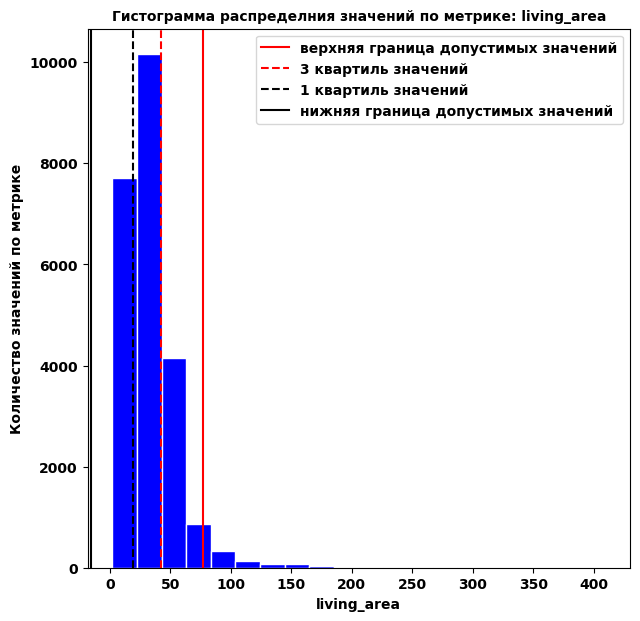

Доля значений, выходящих за верхнюю границу: 3.75%
Доля значений, выходящих за нижнюю границу: 0.00%


In [130]:
# построение гистограммы распределения для метрики 'living_area'
histogram_plotting(data, 'living_area', 20, 7, 7)

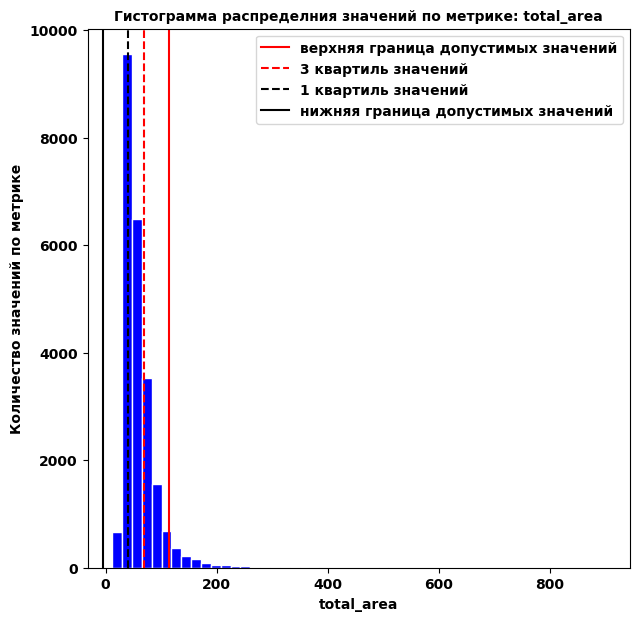

Доля значений, выходящих за верхнюю границу: 5.26%
Доля значений, выходящих за нижнюю границу: 0.00%


In [131]:
# построение гистограммы распределения для метрики 'total_area'
histogram_plotting(data, 'total_area', 50, 7, 7)

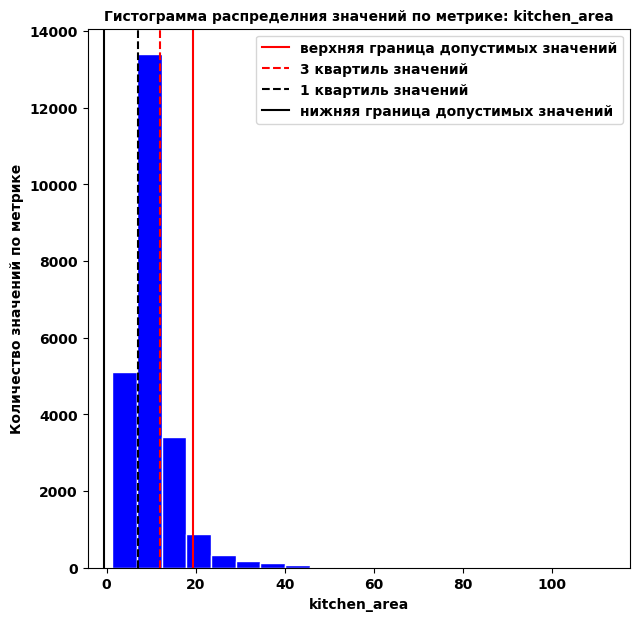

Доля значений, выходящих за верхнюю границу: 5.53%
Доля значений, выходящих за нижнюю границу: 0.00%


In [132]:
# построение гистограммы распределения для метрики 'kitchen_area'
histogram_plotting(data, 'kitchen_area', 20, 7, 7)

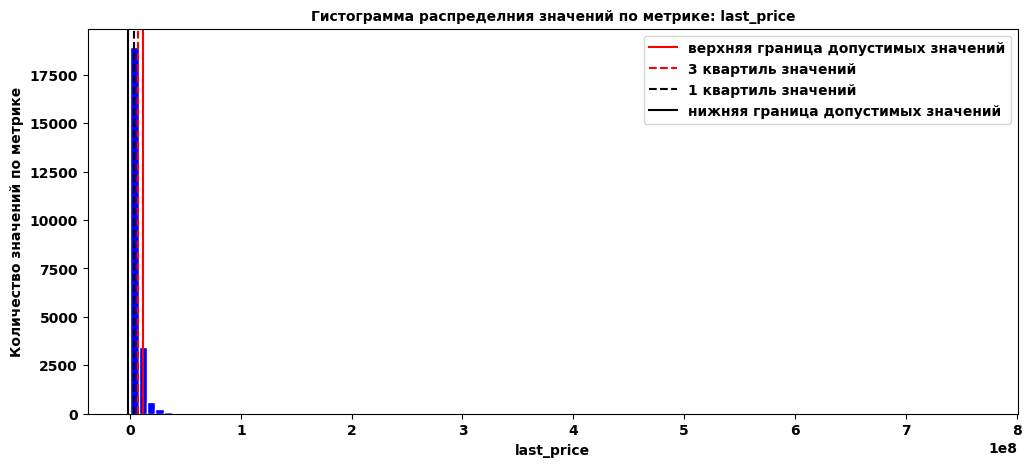

Доля значений, выходящих за верхнюю границу: 8.68%
Доля значений, выходящих за нижнюю границу: 0.00%


In [133]:
# построение гистограммы распределения для метрики 'last_price'
histogram_plotting(data, 'last_price', 100, 12, 5)

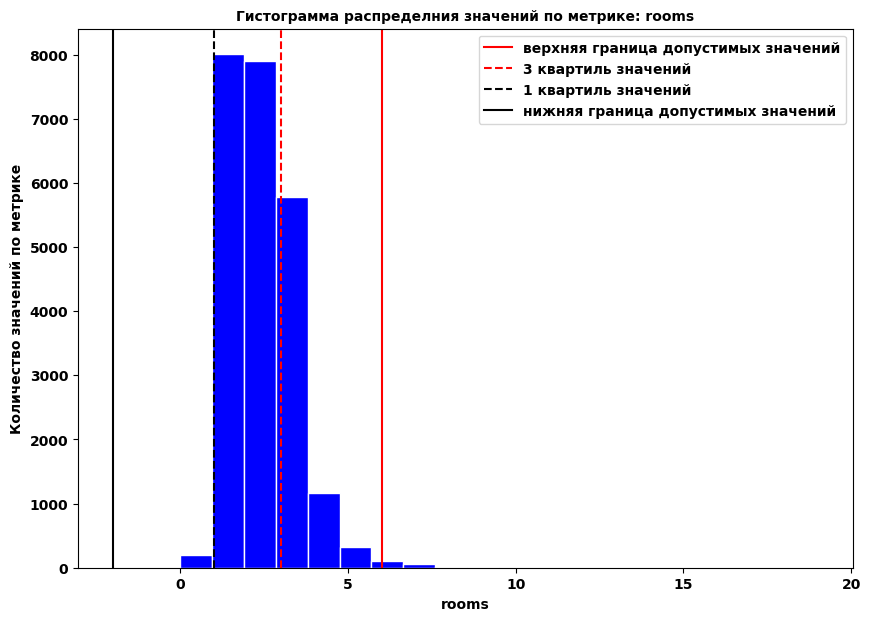

Доля значений, выходящих за верхнюю границу: 0.38%
Доля значений, выходящих за нижнюю границу: 0.00%


In [134]:
# построение гистограммы распределения для метрики 'rooms'
histogram_plotting(data, 'rooms', 20, 10, 7)

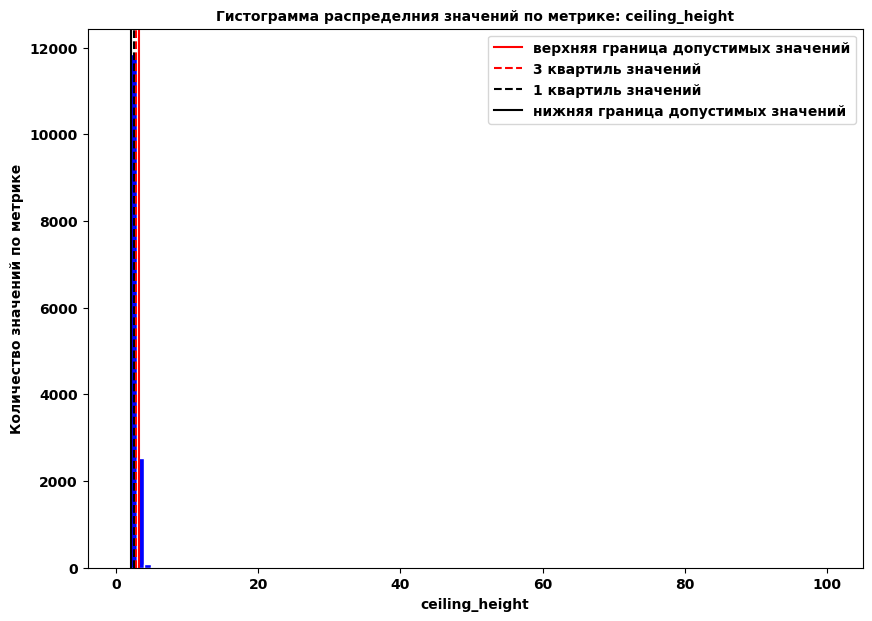

Доля значений, выходящих за верхнюю границу: 3.42%
Доля значений, выходящих за нижнюю границу: 0.06%


In [135]:
# построение гистограммы распределения для метрики 'ceiling_height'
histogram_plotting(data, 'ceiling_height', 100, 10, 7)

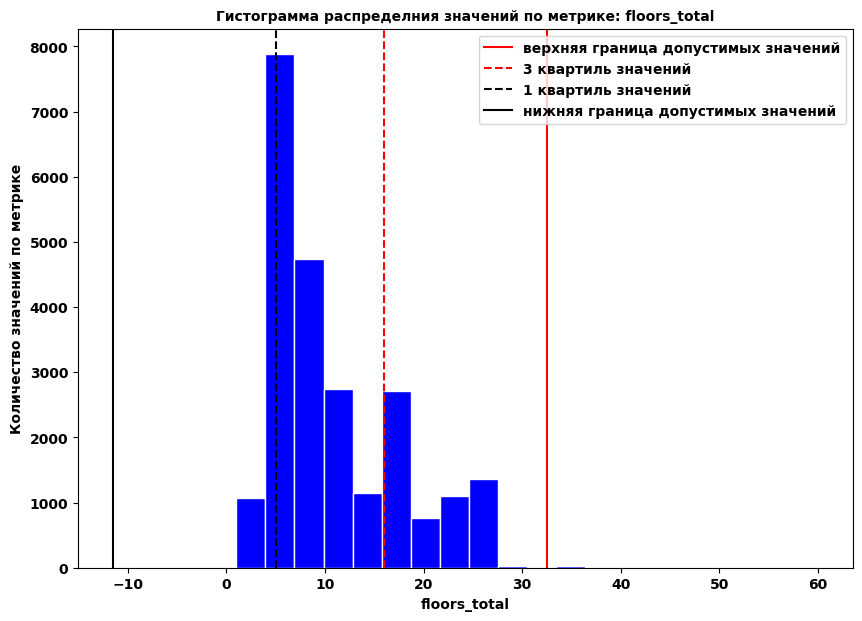

Доля значений, выходящих за верхнюю границу: 0.14%
Доля значений, выходящих за нижнюю границу: 0.00%


In [136]:
# построение гистограммы распределения для метрики 'floors_total'
histogram_plotting(data, 'floors_total', 20, 10, 7)

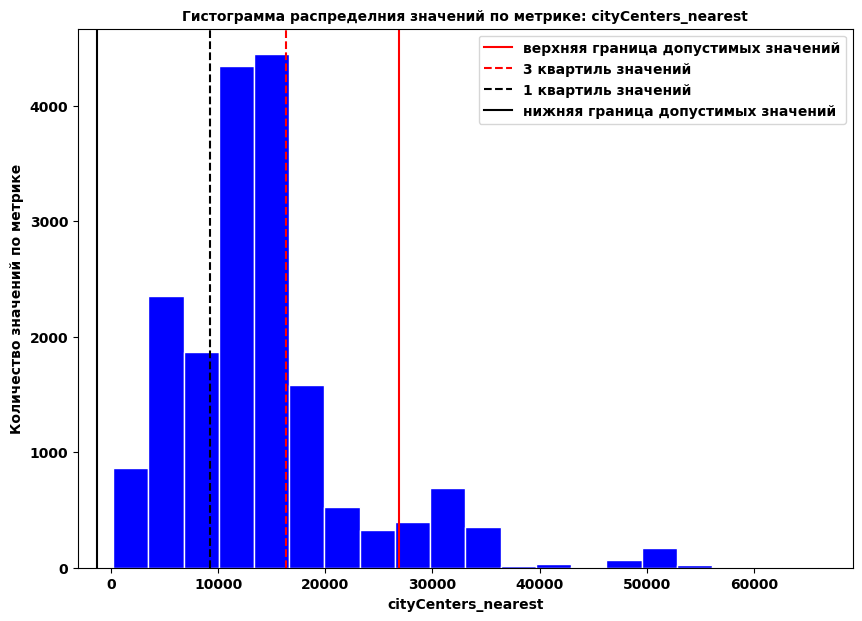

Доля значений, выходящих за верхнюю границу: 7.31%
Доля значений, выходящих за нижнюю границу: 0.00%


In [137]:
# построение гистограммы распределения для метрики 'cityCenters_nearest'
histogram_plotting(data, 'cityCenters_nearest', 20, 10, 7)

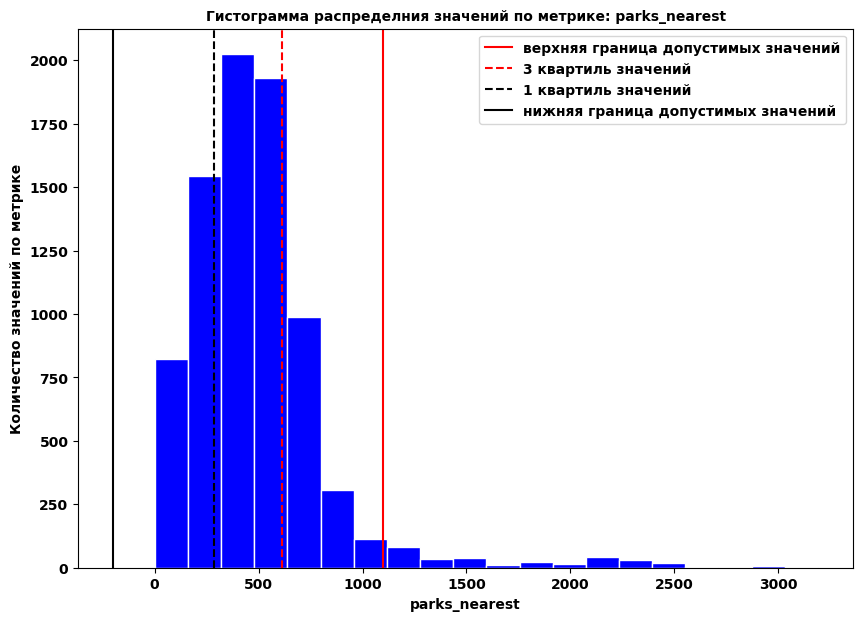

Доля значений, выходящих за верхнюю границу: 1.32%
Доля значений, выходящих за нижнюю границу: 0.00%


In [138]:
# построение гистограммы распределения для метрики 'parks_nearest'
histogram_plotting(data, 'parks_nearest', 20, 10, 7)

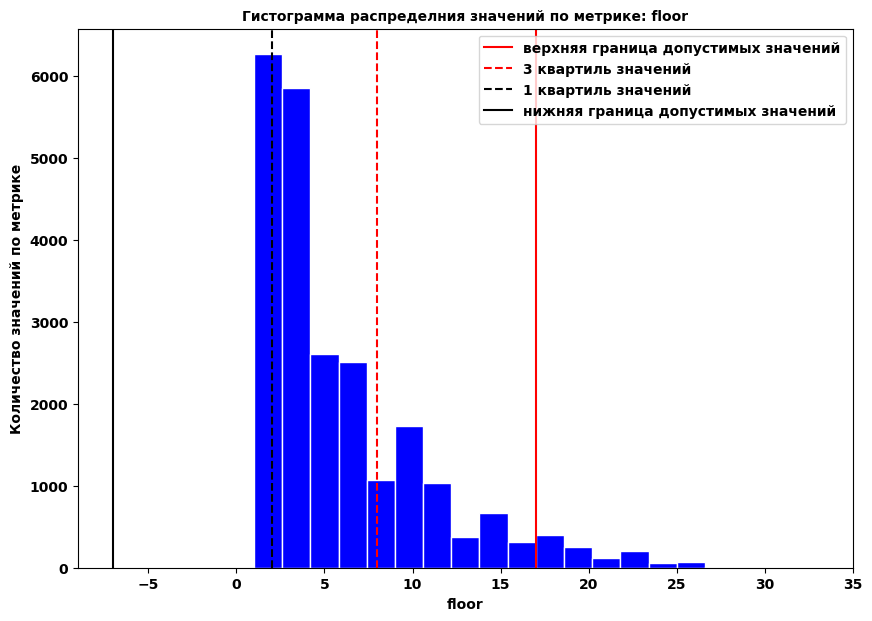

Доля значений, выходящих за верхнюю границу: 3.83%
Доля значений, выходящих за нижнюю границу: 0.00%


In [139]:
# построение гистограммы распределения для метрики 'floor'
histogram_plotting(data, 'floor', 20, 10, 7)

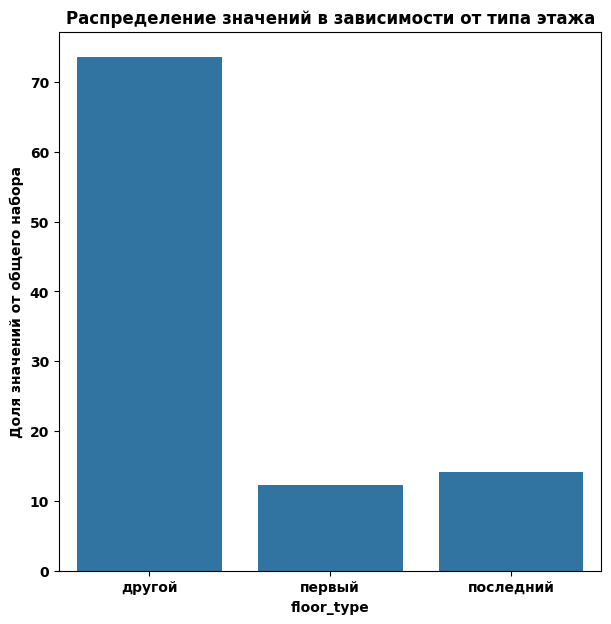

In [140]:
# построение гистограммы распределения для метрики 'floor_type'
plt.figure(figsize = (7, 7))
sns.countplot(data, x = 'floor_type', stat = 'percent')
plt.title('Распределение значений в зависимости от типа этажа')
plt.ylabel('Доля значений от общего набора')
plt.show()

**Вывод по построенной визуализации**

1. По значениям `'total_area', 'kitchen_area' и 'living_area'` **обнаружены аномальные значения**, принимая во внимание вводную о том, что **если доля значений, превышащих верхний порог, выше 10%, то считаем подобные случаи закономерностью в данных**. Так как исследование направлено на исследование **типового** жилья в Ленинградской области, то можно исключить объявления из общего набора данных, где значения площади превышают соответствующие верхние границы;
2. Значения цены - `'last_price'` - **это субъективная (а может, и объективная) оценка владельцем своего актива**. Действительно - часть цен выбивается из общего набора, но это может быть реальный объект жилья элитного класса;
3. Высота потолков `'ceiling_height'` **уже содержит аномальные значения** - сложно представить себе жилье в настоящее время, у которого высота потолка (даже в частном доме) была бы больше 10 метров (такое помещение будет, банально, сложнее обогревать).;
4. Столбец с количеством комнат - `'rooms'` - можно рассмотреть, как столбец, содержащий аномально большие значения. **На дальнейшем этапе такие значения будут удалены**;
5. Столбец с количеством этажей в доме - `'floors_total'` - вполне вероятно содержит аномальные значения, но его нужно рассмотреть в совокупности с названием населенного пункта: представить 30-этажный дом в Санкт-Петербурге вполне можно, а в каком-нибудь селе - нет.
6. Показатели по расстоянию до географических объектов - `'parks_nearest' и 'cityCenters_nearest'` - аномалий не содержат, но возникает вопрос, до какого центра считается расстояние. Представить удаленность от центра 50 км достаточно сложно, если только за **центр города** не принят Санкт-Петербург.

### Обработка аномальных значений в наборе данных <a class = 'anchor' id = 'Исследование_аномалии'></a>

На данном этапе необходимо очистить набор данных от аномальных значений по различным показателям.

На рассмотрении находятся параметры:
* 'living_area' - жилая площадь;
* 'total_area' - общая площадь;
* 'kitchen_area' - площадь кухни;
* 'rooms' - количество комнат;
* 'ceiling_height' - высота потолков;
* 'floors_total' - количество этажей в доме;

In [141]:
# формирование списка верхних границ по переданным метрикам

#пустой список для хранения верхних границ указанных метрик для текущего состояния набора данных 
upper_list = []

for feature in ['living_area', 'total_area', 'kitchen_area', 'rooms', 'ceiling_height']:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    upper_bound = q3 + 1.5 * (q3 - q1)

    upper_list.append(upper_bound)
    print(f'Верхняя граница по метрике {feature} равна: {upper_bound}')

Верхняя граница по метрике living_area равна: 76.75
Верхняя граница по метрике total_area равна: 114.25
Верхняя граница по метрике kitchen_area равна: 19.5
Верхняя граница по метрике rooms равна: 6.0
Верхняя граница по метрике ceiling_height равна: 3.235


Исходя из демонстрируемых показателей, необходимо исключить аномальные значения из набора.

Примем, что, **если значение выбивается из границ допустимых значений (1.5 межквартильных размаха), то такие объекты исключаем из общего набора со следуюшей вводной: верхняя граница фильтрации значений 'ceiling_height' будет 10 метров, так как такие варианты потолков существуют в жилье элитного класса**.

In [142]:
# инициализация переменной для хранения строк до очистки от аномальных значений
data_rows1 = data.shape[0]

# список для хранения метрик
feature_list = ['living_area', 'total_area', 'kitchen_area', 'rooms']

# цикл для фильтрации аномальных значений
for i in range(len(upper_list)):
    for j in range(len(feature_list)):
        if i == j:
            data = data[(data[feature_list[j]].isna() == True) | (data[feature_list[j]] <= upper_list[i])]
        else:
            continue

In [143]:
ceil_lower = data['ceiling_height'].quantile(0.25) - 1.5 * (data['ceiling_height'].quantile(0.75) - data['ceiling_height'].quantile(0.25))

# фильтрация аномальных значений по высоте потолков
data = data[(data['ceiling_height'].isna() == True) | ((data['ceiling_height'] >= ceil_lower) & (data['ceiling_height'] <= 10))]

In [144]:
# вывод на экран локации домов с количеством этажей больше 30
data[data['floors_total'] >= 30]['locality_name'].unique()

array(['санкт-петербург', 'кронштадт'], dtype=object)

Представить дома этажностью выше, чем "30", в таком месте как Кронштадт очень сложно. Скорее всего это может быть либо намеренное введение пользователя в заблуждение, либо попытка нечестной продажи жилья - случай "черного риелторства".  

In [145]:
# фильтрация значений по обозначенному выше условию
data = data[~((data['floors_total'] >= 30) & (data['locality_name'] == 'кронштадт'))]

In [146]:
data_rows2 = data.shape[0]

print('Доля исключенных строк после фильтрации: {:.2%}'.format((data_rows1 - data_rows2) / data_rows1))

Доля исключенных строк после фильтрации: 8.53%


### Определение факторов, больше всего влияющих на цену объекта недвижимости <a class = 'anchor' id = 'Исследование_цены'></a>

Необходимо определить признаки, больше всего влияющие на значение цены жилья - `'last_price'`.

Признаки для проведения исследования следующие:

* `'living_area'` - жилая площадь;
* `'total_area'` - общая площадь;
* `'kitchen_area'` - площадь кухни;
* `'rooms'` - количество комнат;
* `'floor'` - этаж расположения квартиры;
* `'week_day'` - день размещения объявления;
* `'month'` - месяц размещения объявления;
* `'year'` - год размещения объявления;

In [147]:
# пользовательская функция исследования линейной взаимосвязи между двумя признаками набора данных
def corr_info (data: pd.DataFrame, first_feature: str, second_feature: str):
    data.plot(
        x = first_feature,
        y = second_feature,
        kind = 'scatter'
    )
    plt.show()

    print(f'Коэффициент корреляции Пирсона между {first_feature} и {second_feature}', data[first_feature].corr(data[second_feature]))

Взаимосвязь показателя living_area и "last_price"


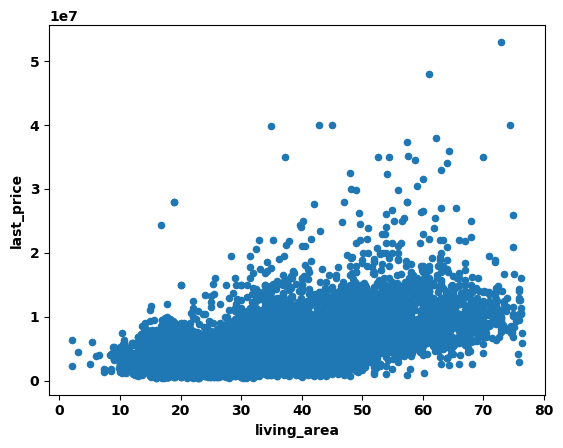

Коэффициент корреляции Пирсона между living_area и last_price 0.5740258948448115

Взаимосвязь показателя total_area и "last_price"


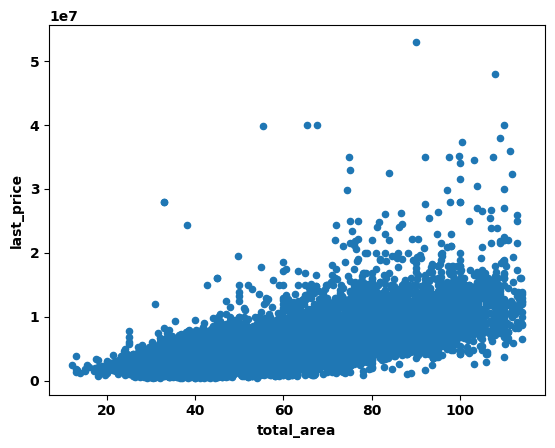

Коэффициент корреляции Пирсона между total_area и last_price 0.6786522839788561

Взаимосвязь показателя kitchen_area и "last_price"


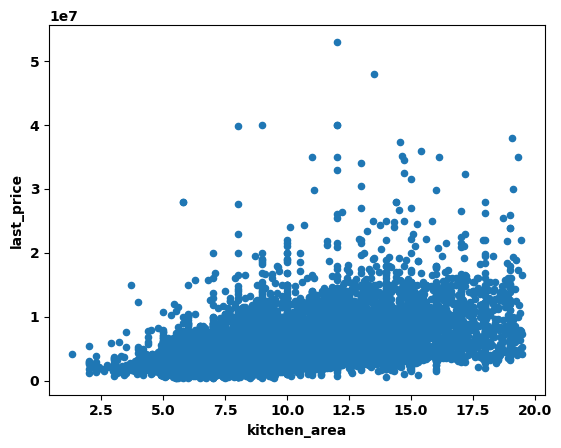

Коэффициент корреляции Пирсона между kitchen_area и last_price 0.5086656862037919



In [148]:
# построение диаграмм для количественных непрерывных величин
for feature in ['living_area', 'total_area', 'kitchen_area']:
    print(f'Взаимосвязь показателя {feature} и "last_price"')
    corr_info(data, feature, 'last_price')
    print()

Столбчатая диаграмма по призаку rooms и "last_price"


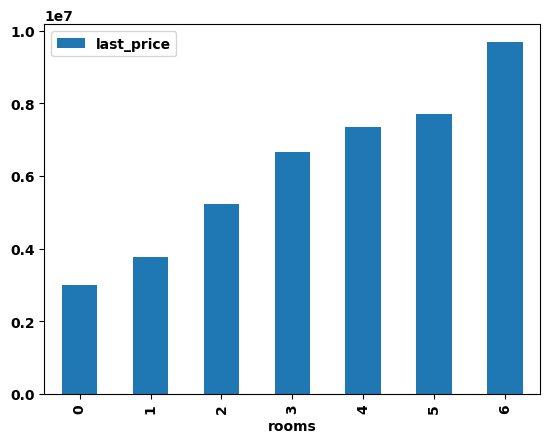

Столбчатая диаграмма по призаку floor и "last_price"


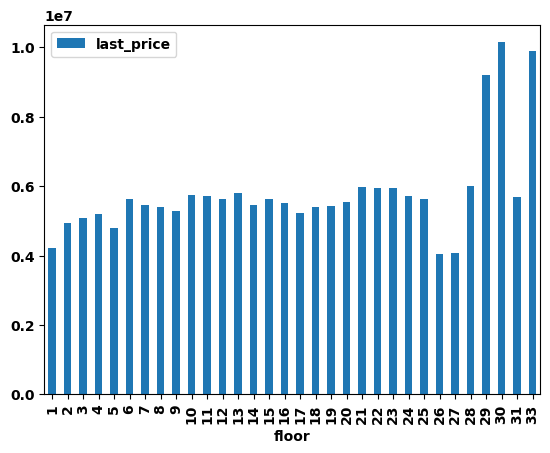

Столбчатая диаграмма по призаку week_day и "last_price"


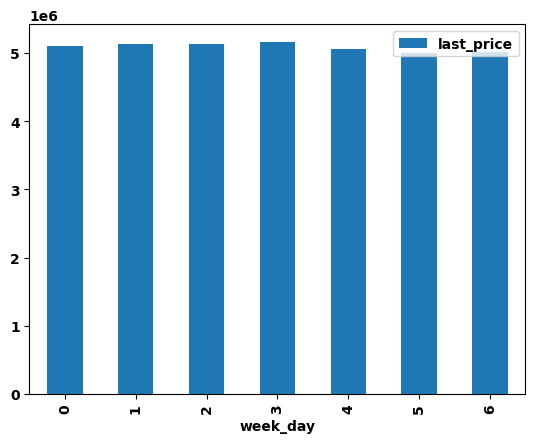

Столбчатая диаграмма по призаку month и "last_price"


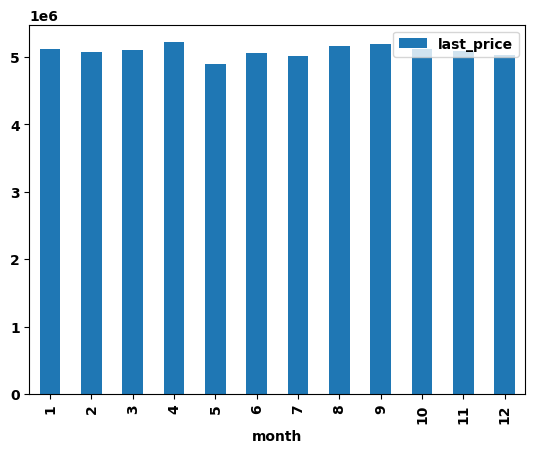

Столбчатая диаграмма по призаку year и "last_price"


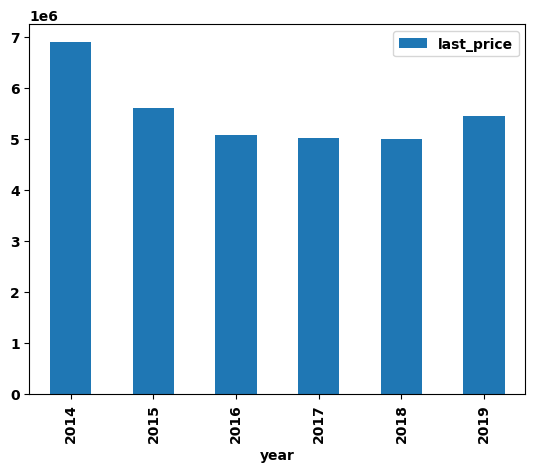

In [149]:
# построение диаграмм для количественных дискретных величин
for feature in ['rooms', 'floor', 'week_day', 'month', 'year']:
    print(f'Столбчатая диаграмма по призаку {feature} и "last_price"')
    data_pivot = data.groupby(feature).agg({'last_price' : 'mean'})
    data_pivot.plot(
        kind = 'bar'
    )
    plt.show()

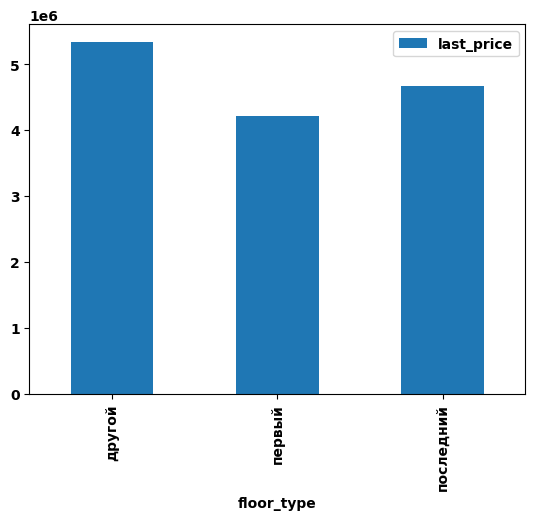

In [150]:
# построение диаграммы средних цен на жилье в зависимости от типа этажа
(data
 .groupby('floor_type')
 .agg({'last_price' : 'mean'})
 .plot(kind = 'bar'))
plt.show()

In [151]:
# вывод на экран информации об объектах на 25 этаже
display(data.query('floor == 25'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,week_day,month,year,floor_type,cityCenters_nearest_km
1975,14,7000000.0,62.00,2018-09-12,2,NaN,25,40.000000,25,False,...,NaN,0.0,NaN,90.0,112903.23,2,9,2018,последний,16.0
3166,15,4750000.0,34.40,2018-07-24,1,2.70,25,16.000000,25,False,...,NaN,0.0,NaN,106.0,138081.40,1,7,2018,последний,16.0
3241,14,8950000.0,87.00,2016-04-15,2,2.67,26,43.000000,25,False,...,1416.0,0.0,NaN,198.0,102873.56,4,4,2016,другой,10.0
4683,2,3650000.0,35.00,2018-02-01,0,NaN,25,23.400000,25,False,...,NaN,0.0,NaN,100.0,104285.71,3,2,2018,последний,12.0
4734,10,5799000.0,60.40,2017-10-26,2,2.75,25,32.000000,25,False,...,NaN,NaN,NaN,73.0,96009.93,3,10,2017,последний,NaN
5882,17,4700000.0,34.00,2019-02-11,1,2.65,25,15.800000,25,False,...,NaN,0.0,NaN,61.0,138235.29,0,2,2019,последний,10.0
6161,5,3600000.0,42.00,2017-07-21,1,2.75,25,16.000000,25,False,...,NaN,NaN,NaN,87.0,85714.29,4,7,2017,последний,NaN
7094,10,7900000.0,83.45,2017-06-05,3,NaN,25,46.900000,25,False,...,NaN,0.0,NaN,153.0,94667.47,0,6,2017,последний,15.0
7684,14,4200000.0,45.50,2017-09-01,1,NaN,25,21.600000,25,False,...,NaN,0.0,NaN,144.0,92307.69,4,9,2017,последний,18.0
7930,13,3895000.0,34.20,2015-07-24,1,NaN,25,17.480000,25,False,...,NaN,2.0,243.0,1314.0,113888.89,4,7,2015,последний,16.0


**Вывод по построенной визуализации:**

1. Наблюдается положительная взаимосвязь между показателями площади жилья - `'total_area', 'living_area' и 'kitchen_area'` - и ценой на жилье. **Действительно, чем больше общая площадь объекта, тем больше и стоимость**;
2. **Не замечено взаимосвязи между размещением объявления в определенный день недели или месяц** - `'week_day' и 'month'`;
3. **Замечена динамика стоимости жилья в зависимости от года размещения объявления** - `'year'`. Замечена высокая стоимость жилья в 2014 году - скорее всего, это следствие введения санкций и роста курса международных валют, что сказалось и на рынке недвижимости. Затем последовала стабилизация рынка и небольшой рост в 2019 году - вполне вероятно, что на волне первых ограничений на волне пандемии коронавируса;
4. **Замечена так же взаимосвязь между типом этажа и ценой жилья** - `'floor_type'/'floor'`. Жилье на первом этаже стоит меньше, чем на других этажах; жилье на высоких этажах зданий (> 29 этажа) стоит выше остальных групп - вполне вероятно, что это квартиры элитного класса с панорамным видом на город, кастомной планировкой и другими условиями, формирующими цену;
5. **Замечена явная взаимосвязь между количеством комнат и стоимостью жилья**. Виден линейный тренд на возрастание цены в зависимости от увеличения числа комнат. Все это подтверждает и информацию о показателях взаимосвязи площади объекта недвижимости и ценой жилья. 

### Изучение скорости продажи недвижимости <a class = 'anchor' id = 'Исследование_показОбъявлений'></a>

Необходимо изучить распределение продолжительности публикации объявлений о продаже квартир.

Ниже приведена гистограмма распределения продолжительности публикации объявлений с отображением среднего и медианного значений размещения объявлений.

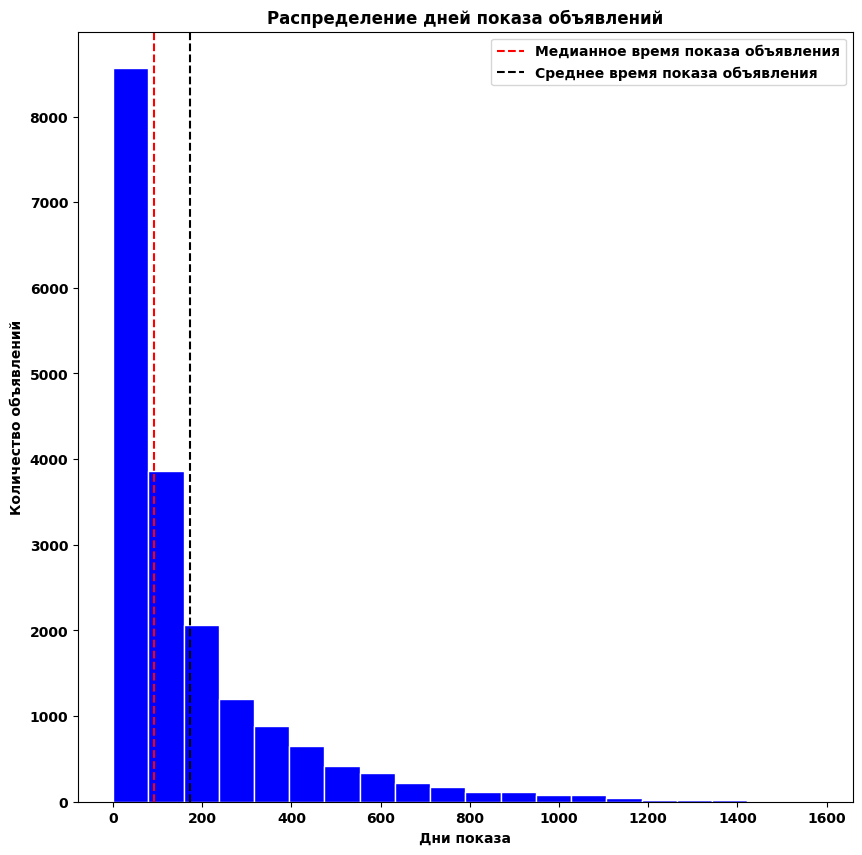

In [152]:
# построение гистограммы распределения времени показа объявлений
plt.figure(figsize = (10, 10))
plt.hist(data['days_exposition'], color = 'blue', edgecolor = 'white', bins = 20)
plt.axvline(data['days_exposition'].median(), c = 'red', ls = '--', label = 'Медианное время показа объявления')
plt.axvline(data['days_exposition'].mean(), c = 'black', ls = '--', label = 'Среднее время показа объявления')
plt.title('Распределение дней показа объявлений')
plt.xlabel('Дни показа')
plt.ylabel('Количество объявлений')
plt.legend()
plt.show()

In [153]:
# вывод на экран описательной статистики
print('Описательная статистика по количеству дней размещения объявлений о продаже')
display(data['days_exposition'].describe())

Описательная статистика по количеству дней размещения объявлений о продаже


count    18871.000000
mean       173.228022
std        211.865584
min          0.000000
25%         44.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [154]:
# определение верхней границы набора данных, по которым будут отобраны аномальные значения
upper_bound_days = data['days_exposition'].quantile(0.75) + 1.5 * (data['days_exposition'].quantile(0.75) - data['days_exposition'].quantile(0.25))

# вывод на экран населенных пунктов, где время показа объявлений выше 800 дней
print(f'Населенные пункты с малой скоростью продажи жилья:', list(data[data['days_exposition'] >= upper_bound_days]['locality_name'].unique()))
print()
print(f'Описательная статистика стоимости жилья с малой скоростью продажи:')
display(data[data['days_exposition'] >= upper_bound_days]['last_price'].describe())

Населенные пункты с малой скоростью продажи жилья: ['санкт-петербург', 'кировск', 'пушкин', 'всеволожск', 'сертолово', 'сестрорецк', 'колпино', 'оржицы', 'шушары', 'кузьмоловский', 'петергоф', 'выборг', 'кудрово', 'волосово', 'пикалёво', 'красное село', 'вартемяги', 'мурино', 'севастьяново', 'гатчина', 'новое девяткино', 'старая', 'никольское', 'парголово', 'ломоносов', 'нурма', 'молодцово', 'подпорожье', 'войсковицы', 'тосно', 'первомайское', 'сланцы', 'павловск', 'фёдоровское', 'юкки', 'волхов', 'тельмана', 'вырица', 'луга', 'коммунар', 'янино-1', 'агалатово', 'сельцо', 'аннино', 'терволово', 'малое карлино', 'кириши', 'красный бор', 'шлиссельбург', 'кальтино', 'приозерск', 'колтуши', 'кингисепп', 'красная долина', 'рахья', 'рябово', 'гарболово', 'стеклянный', 'сапёрный', 'рощино', 'дружная горка', 'имени морозова', 'заневка', 'ульяновка', 'белогорка', 'мга', 'елизаветино', 'низино', 'сяськелево', 'синявино', 'русско-высоцкое', 'металлострой', 'молодёжное', 'кипень', 'назия', 'иванго

count    1.587000e+03
mean     5.645144e+06
std      3.564684e+06
min      4.900000e+05
25%      3.450000e+06
50%      4.800000e+06
75%      6.700000e+06
max      4.000000e+07
Name: last_price, dtype: float64

**Вывод по построенной визуализации**

Среднее время продажи смещено относительно медианы в сторону правого хвоста по причине больших значений публикации объявлений, так как **среднее** больше подвержено влиянию аномальных значений.

**Средний срок размещения объявлений - 173 дня**

**Медианное значение публикации объявлений - 91 день**

Быстрой продажей можно считать те объявления, которые попали в границы 1 квартиля - первые 25% значений от общей выборки - **менее 44 дней с момента публикации**.

Неликвидное жилье расположено, как в самом центре региона - Санкт-Петербурге - так и в районах области. При этом, это либо дорогостоящее жилье (о чем свидетельствует метрика максимального значения - 40 млн у.е.), либо жилье, которое имеет некомфортное расположение.

### Изучение стоимости жилья в 10 самых популярных населенных пунктах <a class = 'anchor' id = 'Изучение_топ10'></a>

Необходимо составить рейтинг населенных пунктов с наибольшим количеством объявлений о продаже жилья, а также сформировать свод о средних ценах за 1 квадратный метр.

Ниже приведена сводная таблица с выделенными наименьшей и наибольшей стоимостями, а также с городами, где самое дешевое и дорогое жилье, среди приведенных ТОП-10.

ТОП-10 населенных пунктов с наибольшим количеством объявлений


,total_ads,mean_price
locality_name,,
санкт-петербург,13887,109225.922450
мурино,574,86170.200523
кудрово,446,95585.357063
шушары,432,78576.772315
всеволожск,386,68548.695829
пушкин,333,100931.119700
колпино,332,75387.719127
парголово,322,90185.293727
гатчина,300,68815.371467



Населенный пункт среди ТОП-10 с НАИБОЛЬШЕЙ стоимостью 1 квадратного метра: санкт-петербург
Населенный пункт среди ТОП-10 с НАИМЕНЬШЕЙ стоимостью 1 квадратного метра: выборг


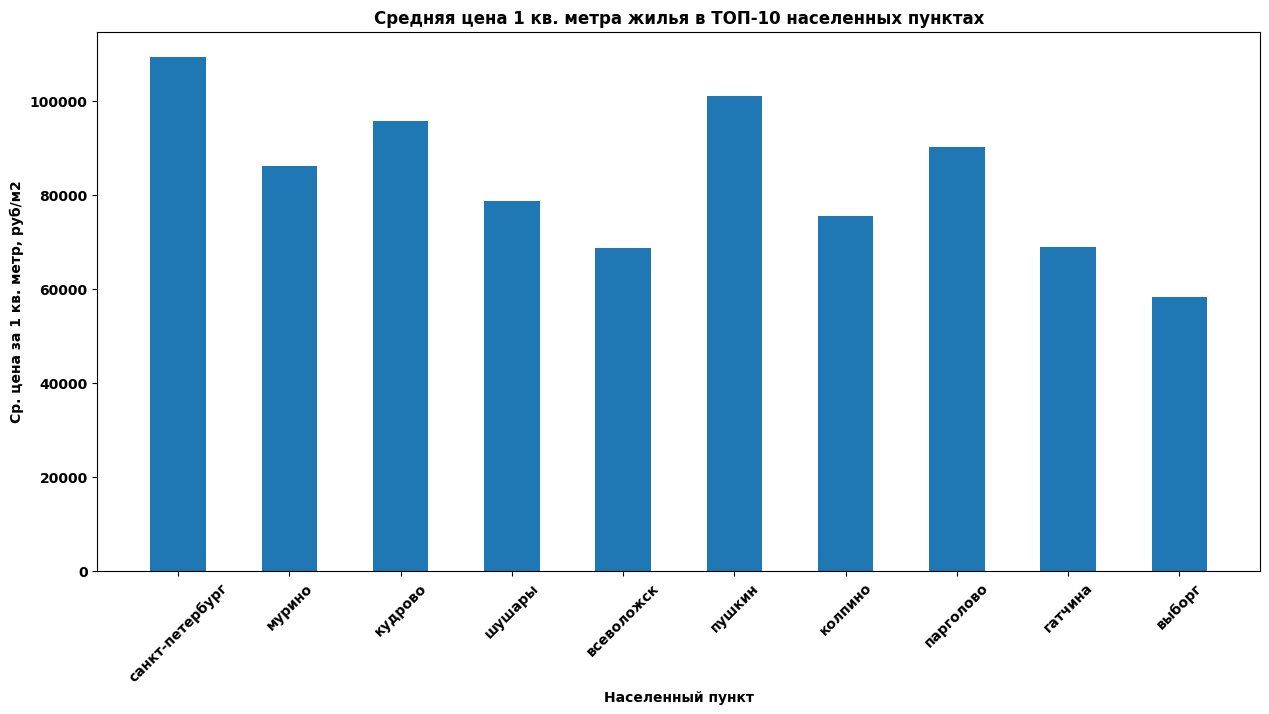

In [155]:
# создание сводной таблицы для формирования топ-10 мест по числу объявлений
top_10_places = data.pivot_table(index = 'locality_name',
                 values = 'price_per_square',
                 aggfunc = ['count', 'mean'])
top_10_places.columns = ['total_ads', 'mean_price']
top_10_places = top_10_places.sort_values(by = 'total_ads', ascending = False).head(10)

print('ТОП-10 населенных пунктов с наибольшим количеством объявлений')
display(top_10_places)
print()
print('Населенный пункт среди ТОП-10 с НАИБОЛЬШЕЙ стоимостью 1 квадратного метра:', top_10_places[top_10_places['mean_price'] == max(top_10_places['mean_price'].values)].index[0])
print('Населенный пункт среди ТОП-10 с НАИМЕНЬШЕЙ стоимостью 1 квадратного метра:', top_10_places[top_10_places['mean_price'] == min(top_10_places['mean_price'].values)].index[0])


plt.figure(figsize=(15, 7))
plt.bar(top_10_places.index, top_10_places['mean_price'], width=0.5)
plt.title("Средняя цена 1 кв. метра жилья в ТОП-10 населенных пунктах")
plt.xlabel('Населенный пункт')
plt.ylabel("Ср. цена за 1 кв. метр, руб/м2")
plt.xticks(rotation = 45)
plt.show()

**Вывод по подготовленному своду:**

В ТОП-10 населенных пунктов по количеству объявлений находятся Санкт-Петербург и его близлежащие районы и городские агломерации.

Самая низкая стоимость жилья в Выборге в этом рейтинге объясняется изношенным жилым фондом, уровнем зарплат и "стоимостью жизни" в данном регионе.

Самая высокая стоимость жилья в Санкт-Петербурге не требует дополнительных объяснений.

### Изучение стоимости недвижимости в Санкт-Петербурге в зависимости от расположения от центра города <a class = 'anchor' id = 'Исследование_центрПитера'></a>

Необходимо изучить, как меняется цена жилья в Санкт-Петербурге в зависимости от того, как объекты недвижимости расположены относительно центра города.

Ниже приведена диаграмма **средних** цен на жилье на каждом километре удаленности от центра.


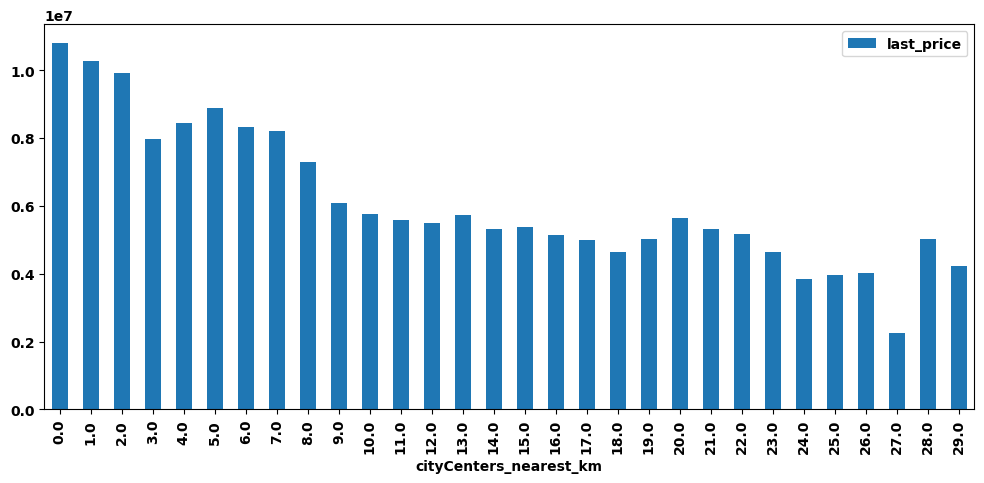

In [156]:
(data[data['locality_name'] == 'санкт-петербург']
 .groupby('cityCenters_nearest_km').agg({'last_price':'mean'})
 .plot(kind = 'bar', figsize = (12, 5)))
plt.show()

**Вывод по приведенной визуализации:**

1. **Самое дорогое жилье** в городе расположено в **самом центре** - средняя цена находится на уровне 30 миллионов у.е;
2. По мере удаления от центра цена начинает убывать - планомерное убывание продолжается вплоть до 4 километра. Скорее всего, **цена убывает не только по причине удаления от центра, но и из-за качества жилья и коммунальных условий в доме**;
3. **Возрастание цен на диапазоне 4 - 7 км** можно объяснить объявлениями о квартирах **в новых районах Санкт-Петербурга - в новых жилых комплексах**;
4. Последующее убывание цен отображает выход за пределы черты города. **Единственное возрастание цены - 27 км** - вероятнее всего показывает **объекты, которые расположены в элитных коттеджных поселках**.

## Общий вывод по исследованию <a class = 'anchor' id = 'Вывод'></a>

Ход исследования:

1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas** и **numpy**;
    * для визуализации данных - **matplotlib.pyplot** и **seaborn**;
2. Загружены данные в рабочую среду Jupyter Notebook. Инициализирована переменная **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * переченя столбцов набора данных;
    * общей информации о наборе данных;
4. Набор данных характеризуется следующими показателями:
    * 23 699 - количество строк в датасете;
    * 22 - количество показателей, описывающих объект;
    * 2 столбца, имеющих явный булевый тип данных;
    * 14 столбцов, имеющих явный тип 'float';
    * 3 столбца - тип данных 'int';
    * 3 столбца - тип данных 'object';
    * 2 775 - самое минимальное количество непустых значений в столбце (признак 'is_apartment'); 
5. Построены гистограммы распределения числовых показателей;
6. Обработаны пустые значения в данных:
    * в параметрах `'floors_total' и 'locality_name'` строки с пропущенными значениями удалены;
    * в параметрах `'kitchen_area' и 'living_area'` пустые значения заполнены величиной рассчитаной с использованием средних долей площади кухни и жилой площади от общей площади;
    * в параметре `'balcony'` - пустые значения заполнены 0;
    * в параметре `'is_apartment'` - заполнены значением False;
7. Преобразованы типы данных в столбцах таблицы:
    * `'floors_total'` - к типу **Int**;
    * `'is_apartment'` - к типу **Bool**;
    * `'balcony'` - к типу **Int**;
    * `'parks_around3000'` - к типу **Int**;
    * `'days_exposition'` - к типу **Int**;
    * `'first_day_exposition'` - к тиру **datetime**;
8. Датасет проверен на дубликаты и очищен от подобных значений:
    * Явные дубликаты - **не обнаружено**;
    * Неявные дубликаты - **преобразованы названия населенных пунктов**;
9. Построены гистограммы распределения значений:
    * `'living_area'` - жилая площадь;
    * `'total_area'` - общая площадь;
    * `'kitchen_area'` - площадь кухни;
    * `'last_price'` - последняя цена;
    * `'rooms'` - количество комнат;
    * `'ceiling_height'` - высота потолков;
    * `'floors_total'` - количество этажей в доме;
    * `'floor'` - этаж квартиры;
    * `'floor_type'` - тип этажа квартиры;
    * `'cityCenters_nearest'` - расстояние до центра города;
    * `'parks_nearest'` - расстояние до ближайшего парка;
10. Обработаны аномальные значения в наборе данных;
11. Изучен срок продажи недвижимости;
12. Определены факторов, которые больше всего влияют на полную стоимость объекта, среди:
    * `'living_area'` - жилая площадь;
    * `'total_area'` - общая площадь;
    * `'kitchen_area'` - площадь кухни;
    * `'rooms'` - количество комнат;
    * `'floor_type'` - этаж расположения квартира;
    * `'week_day'` - день размещения объявления;
    * `'month'` - месяц размещения объявления;
    * `'year'` - год размещения объявления;
13. Изучена стоимость жилья в 10 самых популярных населенных пунктах по количеству объявлений;
14. Изучена стоимость недвижимости в Санкт-Петербурге в зависимости от расположения от центра города;

**Основные выводы по исследованию:**

Показатели, влияющие на цену объекта: 
* 'total_area' - общая площадь объекта недвижимости;
* 'living_area' - жилая площадь объекта недвижимости;
* 'kitchen_area' - площадь кухни объекта недвижимости;
* 'year' - год (те или иные глобальные события в календарный год);
* 'floor_type/floor' - тип этажа и сам этаж;
* 'rooms' - количество комнат;


Показатели, не влияющие на цену объекта:
* 'month' - месяц;
* 'week_day' - день недели;

**Средний срок размещения объявлений - 173 день**

**Медианное значение публикации объявлений - 91 дней**

Быстрой продажей можно считать те объявления, которые попали в границы 1 квартиля - первые 25% значений от общей выборки - **менее 44 дней с момента публикации**.

Неликвидное жилье расположено, как в самом центре региона - Санкт-Петербурге - так и в районах области. При этом, это либо дорогостоящее жилье (о чем свидетельствует метрика максимального значения - 40 млн у.е.), либо жилье, которое имеет некомфортное расположение.

**В ТОП-10 населенных пунктов по количеству объявлений находятся Санкт-Петербург и его близлежащие районы и городские агломерации.**

**Самая низкая стоимость жилья в Выборге в этом рейтинге объясняется изношенным жилым фондом, уровнем зарплат и "стоимостью жизни" в данном регионе.**

**Характеристика стоимости жилья в Санкт-Петербурге**
1. **Самое дорогое жилье** в городе расположено в **самом центре** - средняя цена находится на уровне 30 миллионов у.е;
2. По мере удаления от центра цена начинает убывать - планомерное убывание продолжается вплоть до 4 километра. Скорее всего, **цена убывает не только по причине удаления от центра, но и из-за качества жилья и коммунальных условий в доме**;
3. **Возрастание цен на диапазоне 4 - 7 км** можно объяснить объявлениями о квартирах **в новых районах Санкт-Петербурга - в новых жилых комплексах**;
4. Последующее убывание цен отображает выход за пределы черты города. **Возрастание цены в диапазоне 19-23 км** вероятнее всего показывает **объекты, которые расположены в элитных коттеджных поселках**.